In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl


df = pd.read_csv("Bank Data Report.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [3]:
drop_columns = ["CLIENTNUM", "Total_Relationship_Count", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", "Attrition_Flag", "Dependent_count"]
df.drop(columns = drop_columns, inplace = True)

In [4]:
df.rename(columns = {"Months_on_book": "Months_On_Book", "Months_Inactive_12_mon": "Inactive_Months", "Contacts_Count_12_mon": "Contact_Attempts", "Avg_Open_To_Buy": "Average_Credit", "Total_Amt_Chng_Q4_Q1": "Amount_Delta (%)", "Total_Trans_Ct":"Transactions_Count", "Total_Ct_Chng_Q4_Q1": "Transaction_Delta (%)", "Avg_Utilization_Ratio": "Utilization_Rate (%)" })

Customer_Age Gender Education_Level Marital_Status Income_Category  \
0                45      M     High School        Married     $60K - $80K   
1                49      F        Graduate         Single  Less than $40K   
2                51      M        Graduate        Married    $80K - $120K   
3                40      F     High School        Unknown  Less than $40K   
4                40      M      Uneducated        Married     $60K - $80K   
...             ...    ...             ...            ...             ...   
10122            50      M        Graduate         Single     $40K - $60K   
10123            41      M         Unknown       Divorced     $40K - $60K   
10124            44      F     High School        Married  Less than $40K   
10125            30      M        Graduate        Unknown     $40K - $60K   
10126            43      F        Graduate        Married  Less than $40K   

      Card_Category  Months_On_Book  Inactive_Months  Contact_Attempts  \
0              Blue              39                1                 3   
1              Blue              44                1                 2   
2              Blue              36                1                 0   
3              Blue              34                4                 1   
4              Blue              21                1                 0   
...             ...             ...              ...               ...   
10122          Blue              40                2                 3   
10123          Blue              25                2                 3   
10124          Blue              36                3                 4   
10125          Blue              36                3                 3   
10126        Silver              25                2                 4   

       Credit_Limit  Total_Revolving_Bal  Average_Credit  Amount_Delta (%)  \
0           12691.0                  777         11914.0             1.335   
1            8256.0                  864          7392.0             1.541   
2            3418.0                    0          3418.0             2.594   
3            3313.0                 2517           796.0             1.405   
4            4716.0                    0          4716.0             2.175   
...             ...                  ...             ...               ...   
10122        4003.0                 1851          2152.0             0.703   
10123        4277.0                 2186          2091.0             0.804   
10124        5409.0                    0          5409.0             0.819   
10125        5281.0                    0          5281.0             0.535   
10126       10388.0                 1961          8427.0             0.703   

       Total_Trans_Amt  Transactions_Count  Transaction_Delta (%)  \
0                 1144                  42                  1.625   
1                 1291                  33                  3.714   
2                 1887                  20                  2.333   
3                 1171                  20                  2.333   
4                  816                  28                  2.500   
...                ...                 ...                    ...   
10122            15476                 117                  0.857   
10123             8764                  69                  0.683   
10124            10291                  60                  0.818   
10125             8395                  62                  0.722   
10126            10294                  61                  0.649   

       Utilization_Rate (%)  
0                     0.061  
1                     0.105  
2                     0.000  
3                     0.760  
4                     0.000  
...                     ...  
10122                 0.462  
10123                 0.511  
10124                 0.000  
10125                 0.000  
10126                 0.189  

[10127 rows x 17 columns]

In [7]:
df.describe()

Customer_Age  Months_on_book  Months_Inactive_12_mon  \
count  10127.000000    10127.000000            10127.000000   
mean      46.325960       35.928409                2.341167   
std        8.016814        7.986416                1.010622   
min       26.000000       13.000000                0.000000   
25%       41.000000       31.000000                2.000000   
50%       46.000000       36.000000                2.000000   
75%       52.000000       40.000000                3.000000   
max       73.000000       56.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [8]:
df.nunique()

Customer_Age                45
Gender                       2
Education_Level              7
Marital_Status               4
Income_Category              6
Card_Category                4
Months_on_book              44
Months_Inactive_12_mon       7
Contacts_Count_12_mon        7
Credit_Limit              6205
Total_Revolving_Bal       1974
Avg_Open_To_Buy           6813
Total_Amt_Chng_Q4_Q1      1158
Total_Trans_Amt           5033
Total_Trans_Ct             126
Total_Ct_Chng_Q4_Q1        830
Avg_Utilization_Ratio      964
dtype: int64

In [12]:
numeric_columns_data = df.select_dtypes(include = ["number"])
numeric_columns_data.corr()

Customer_Age  Months_on_book  Months_Inactive_12_mon  \
Customer_Age                1.000000        0.788912                0.054361   
Months_on_book              0.788912        1.000000                0.074164   
Months_Inactive_12_mon      0.054361        0.074164                1.000000   
Contacts_Count_12_mon      -0.018452       -0.010774                0.029493   
Credit_Limit                0.002476        0.007507               -0.020394   
Total_Revolving_Bal         0.014780        0.008623               -0.042210   
Avg_Open_To_Buy             0.001151        0.006732               -0.016605   
Total_Amt_Chng_Q4_Q1       -0.062042       -0.048959               -0.032247   
Total_Trans_Amt            -0.046446       -0.038591               -0.036982   
Total_Trans_Ct             -0.067097       -0.049819               -0.042787   
Total_Ct_Chng_Q4_Q1        -0.012143       -0.014072               -0.038989   
Avg_Utilization_Ratio       0.007114       -0.007541               -0.007503   

                        Contacts_Count_12_mon  Credit_Limit  \
Customer_Age                        -0.018452      0.002476   
Months_on_book                      -0.010774      0.007507   
Months_Inactive_12_mon               0.029493     -0.020394   
Contacts_Count_12_mon                1.000000      0.020817   
Credit_Limit                         0.020817      1.000000   
Total_Revolving_Bal                 -0.053913      0.042493   
Avg_Open_To_Buy                      0.025646      0.995981   
Total_Amt_Chng_Q4_Q1                -0.024445      0.012813   
Total_Trans_Amt                     -0.112774      0.171730   
Total_Trans_Ct                      -0.152213      0.075927   
Total_Ct_Chng_Q4_Q1                 -0.094997     -0.002020   
Avg_Utilization_Ratio               -0.055471     -0.482965   

                        Total_Revolving_Bal  Avg_Open_To_Buy  \
Customer_Age                       0.014780         0.001151   
Months_on_book                     0.008623         0.006732   
Months_Inactive_12_mon            -0.042210        -0.016605   
Contacts_Count_12_mon             -0.053913         0.025646   
Credit_Limit                       0.042493         0.995981   
Total_Revolving_Bal                1.000000        -0.047167   
Avg_Open_To_Buy                   -0.047167         1.000000   
Total_Amt_Chng_Q4_Q1               0.058174         0.007595   
Total_Trans_Amt                    0.064370         0.165923   
Total_Trans_Ct                     0.056060         0.070885   
Total_Ct_Chng_Q4_Q1                0.089861        -0.010076   
Avg_Utilization_Ratio              0.624022        -0.538808   

                        Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
Customer_Age                       -0.062042        -0.046446       -0.067097   
Months_on_book                     -0.048959        -0.038591       -0.049819   
Months_Inactive_12_mon             -0.032247        -0.036982       -0.042787   
Contacts_Count_12_mon              -0.024445        -0.112774       -0.152213   
Credit_Limit                        0.012813         0.171730        0.075927   
Total_Revolving_Bal                 0.058174         0.064370        0.056060   
Avg_Open_To_Buy                     0.007595         0.165923        0.070885   
Total_Amt_Chng_Q4_Q1                1.000000         0.039678        0.005469   
Total_Trans_Amt                     0.039678         1.000000        0.807192   
Total_Trans_Ct                      0.005469         0.807192        1.000000   
Total_Ct_Chng_Q4_Q1                 0.384189         0.085581        0.112324   
Avg_Utilization_Ratio               0.035235        -0.083034        0.002838   

                        Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Customer_Age                      -0.012143               0.007114  
Months_on_book                    -0.014072              -0.007541  
Months_Inactive_12_mon            -0.038989              -0.007503  


<Axes: xlabel='Customer_Age', ylabel='Count'>

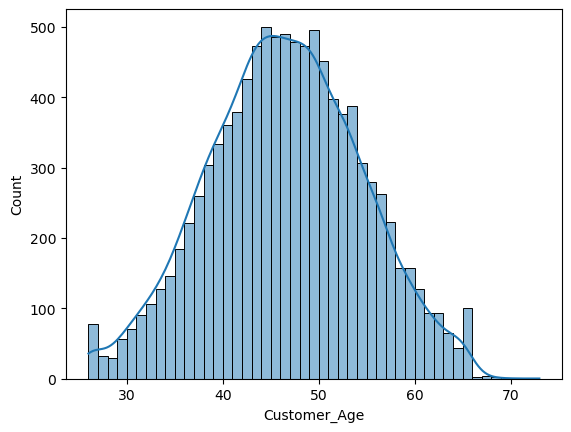

In [14]:
import seaborn as sns
sns.histplot(df['Customer_Age'], kde=True)

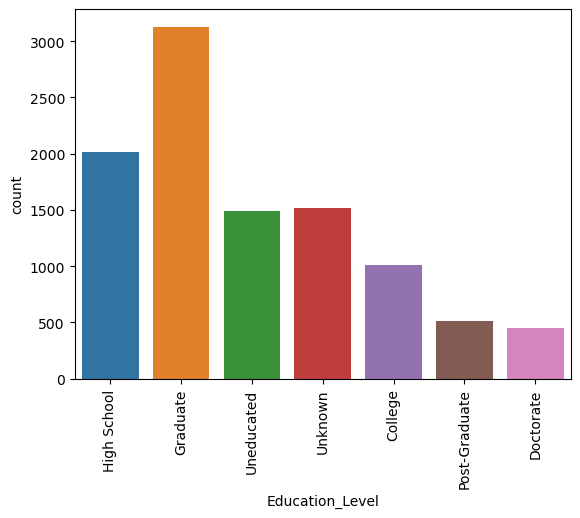

In [17]:
import matplotlib.pyplot as plt

sns.countplot(x='Education_Level', data=df)
plt.xticks(rotation = 90)
plt.show()

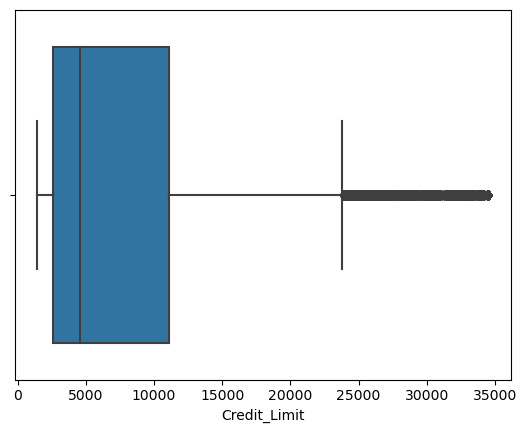

In [18]:
sns.boxplot(x=df['Credit_Limit'])
plt.show()

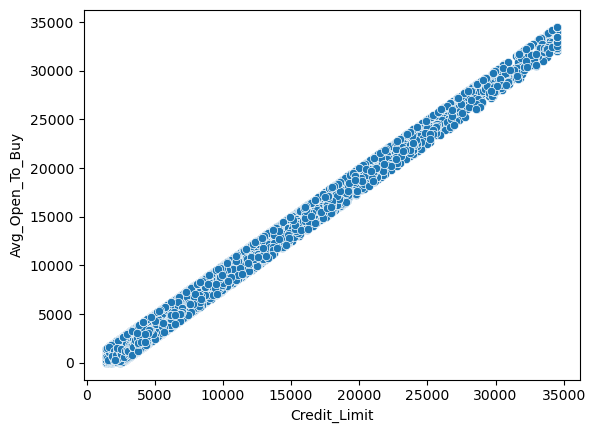

In [19]:
sns.scatterplot(x='Credit_Limit', y='Avg_Open_To_Buy', data=df)
plt.show()

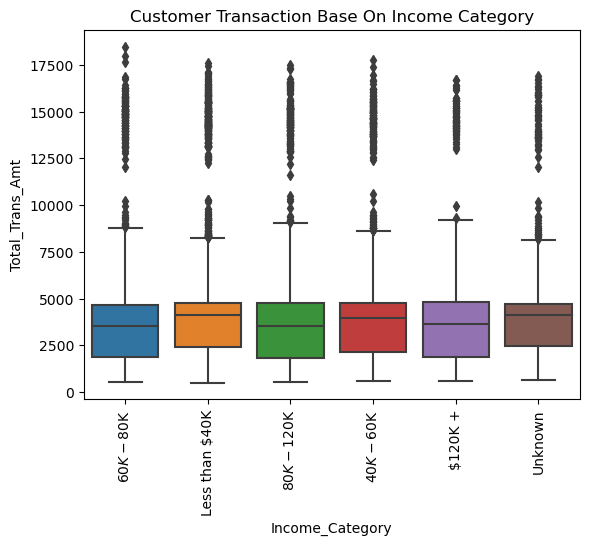

In [21]:
sns.boxplot(x='Income_Category', y='Total_Trans_Amt', data=df)
plt.title("Customer Transaction Base On Income Category")
plt.xticks(rotation = 90)
plt.show()

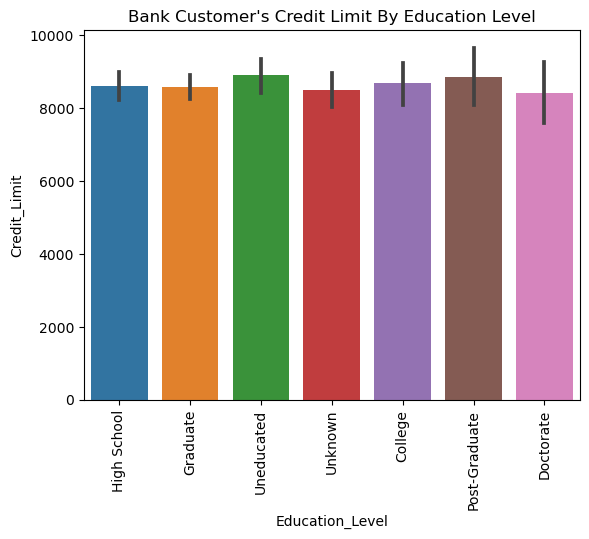

In [22]:
sns.barplot(x='Education_Level', y='Credit_Limit', data=df)
plt.xticks(rotation = 90)
plt.title("Bank Customer's Credit Limit By Education Level")
plt.show()

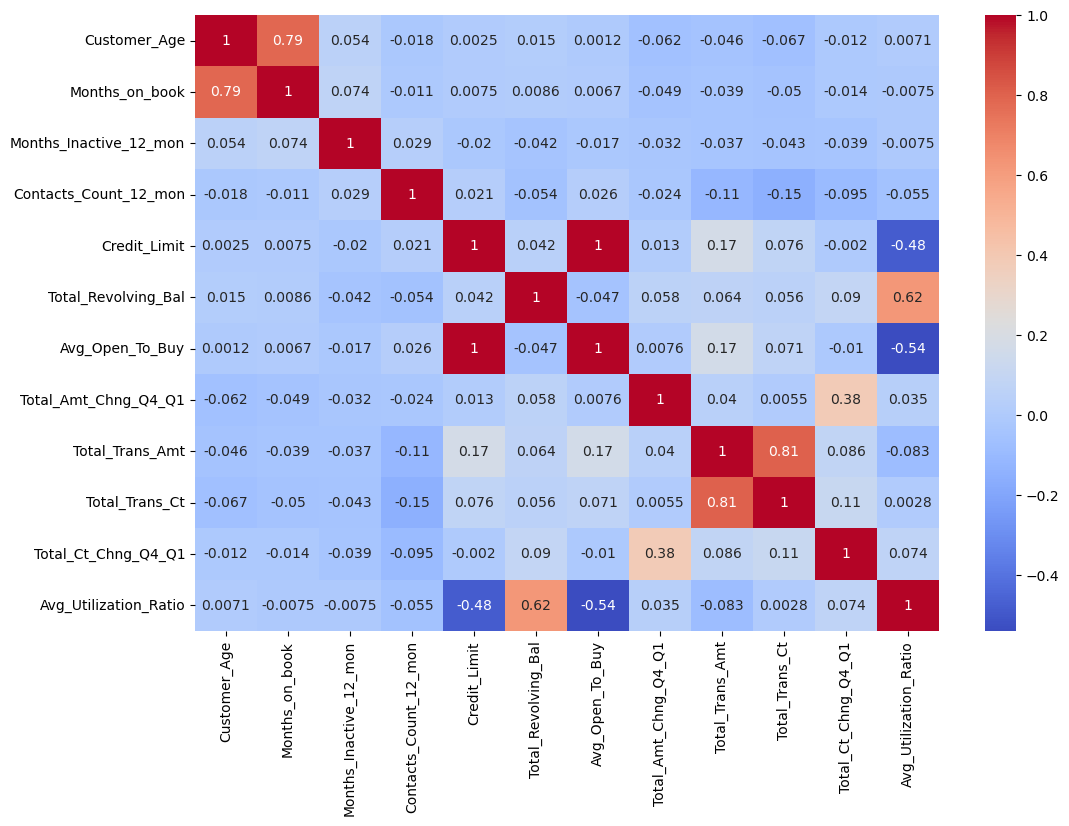

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()